**HOW TO CALL THE CLASS FROM YOUR NOTEBOOK**

In [4]:
#import pandas as pd
#import geopandas
#import matplot.lib.pyplot as plt

#import glob
#import json
#import requests
#import time 

#import folium
#from openrouteservice import client

#%matplot inline

In [5]:
from api.mapbox_api import MapboxAPI
import requests
from urllib.request import urlopen
import json
from shapely.geometry import shape, Polygon

import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import folium

In [6]:
branches = pd.read_csv('../data/clean/branches.csv')
populationDemographics = pd.read_csv('../data/clean/education_demographics.csv')

In [7]:
api = MapboxAPI()

In [8]:
response = api.get_data((41.97557881655979, -87.71361314512697), 15)
response

{'coordinates': [[[-87.713613, 41.987167],
   [-87.716613, 41.985401],
   [-87.719474, 41.982579],
   [-87.721072, 41.981579],
   [-87.721054, 41.977579],
   [-87.719264, 41.976928],
   [-87.719293, 41.976258],
   [-87.72827, 41.976236],
   [-87.729052, 41.975579],
   [-87.728472, 41.97472],
   [-87.727059, 41.974133],
   [-87.725613, 41.97225],
   [-87.718613, 41.967294],
   [-87.715613, 41.965491],
   [-87.714499, 41.965693],
   [-87.714389, 41.964803],
   [-87.713613, 41.964035],
   [-87.708613, 41.966886],
   [-87.704613, 41.97037],
   [-87.703426, 41.970392],
   [-87.700289, 41.973579],
   [-87.699843, 41.974808],
   [-87.698131, 41.975579],
   [-87.700613, 41.97817],
   [-87.702613, 41.978675],
   [-87.704361, 41.979831],
   [-87.705613, 41.980048],
   [-87.706613, 41.979057],
   [-87.707706, 41.979486],
   [-87.707835, 41.983357],
   [-87.713613, 41.987167]]],
 'type': 'Polygon'}

In [9]:
branchRadii = gpd.read_file('../data/clean/branches.csv')

branchRadii[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branchRadii['LOCATION']]
branchRadii.loc[:, 'LATITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LATITUDE'])
branchRadii.loc[:, 'LONGITUDE'] = pd.to_numeric(branchRadii.loc[:, 'LONGITUDE'])
branchRadii.head()


,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED,geometry,LATITUDE,LONGITUDE
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0,None,41.975579,-87.713613
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0,None,41.657198,-87.598838
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0,None,41.801108,-87.726484
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0,None,41.889173,-87.765820
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0,None,41.953123,-87.779285


In [10]:
#for i in range(0, 82):
#    api_response = api.get_data((branchRadii.loc[i,'LATITUDE'],branchRadii.loc[i,'LONGITUDE']), 15)
#    branchRadii.loc[i,'geometry'] = shape(api_response)

#branchRadii

In [11]:
api_response = api.get_data((branchRadii.loc[15,'LATITUDE'],branchRadii.loc[15,'LONGITUDE']), 15)
branchRadii.loc[15,'geometry'] = shape(api_response)

/tmp/ipykernel_1702509/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
/tmp/ipykernel_1702509/524419593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]


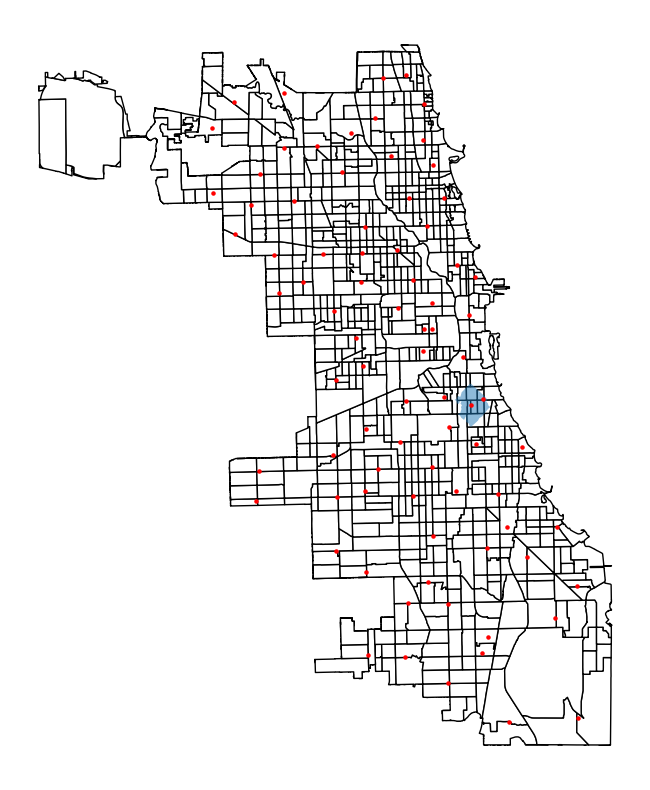

In [12]:
# this line makes a copy of the ageOnly data frame so we can manipulate without affecting our primary dataset
censusTracts = populationDemographics[['geoid','geometry','qualifying name']]
branchLocsOnly=branches[['BRANCH','LOCATION']]

# the following converts the data frame to a geo data frame and plots estimated percent of retired members of each community
censusTracts = gpd.GeoDataFrame(
    censusTracts.loc[:, [c for c in censusTracts.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(censusTracts["geometry"]),
    crs="epsg:4326",
    )

branchLocsOnly.crs = 'EPSG:4326'
branchLocsOnly[['Latitude', 'Longitude']] = [ast.literal_eval(x)[:2] for x in branchLocsOnly['LOCATION']]
branchLocsOnly = branchLocsOnly.drop(columns='LOCATION')
#branchLocsOnly.head()

branchLocsOnly = gpd.GeoDataFrame(
    branchLocsOnly, geometry=gpd.points_from_xy(branchLocsOnly.Longitude, branchLocsOnly.Latitude), crs="EPSG:4326")


fig, ax = plt.subplots(1, figsize=(10, 10))
base = censusTracts.plot(ax=ax, color='white', edgecolor='black')
ax.axis('off')

branchRadii.plot(ax=base, alpha = .5)
branchLocsOnly.plot(ax=base, marker='o', color='red', markersize=5);

In [13]:
#branchRadii.intersection(branchRadii, align=True)
print(censusTracts.shape[0])
censusTracts0to81 = censusTracts.loc[0:82]
censusTracts82to193 = censusTracts.loc[82:194]
censusTracts194to275 = censusTracts.loc[194:276]
censusTracts275to356 = censusTracts.loc[275:357]
censusTracts357to438 = censusTracts.loc[357:439]
censusTracts439to = censusTracts.loc[357:439]

869
